Github地址：https://github.com/hbh112233abc/pdfplumber/blob/stable/README-CN.md#%E6%8F%90%E5%8F%96%E8%A1%A8%E6%A0%BC

In [3]:
import pdfplumber
import pandas as pd

参考来源：https://www.zhihu.com/tardis/bd/art/353397002?source_id=1001

In [4]:
res_path = 'pdftoexcel/color.pdf'
res_pdf = pdfplumber.open(res_path)
# 文档信息
res_pdf.metadata

{'Author': 'gyh',
 'CreationDate': "D:20240317102723+08'00'",
 'ModDate': "D:20240317102723+08'00'",
 'Producer': 'Microsoft® Excel® 2016',
 'Creator': 'Microsoft® Excel® 2016'}

### 页信息

In [5]:
# 页数
len(res_pdf.pages)

1

In [6]:
# 提取首页,读取信息
first_page = res_pdf.pages[0]
print('输出将是一个 CSV，包含 PDF 中每个字符、行和矩形的信息:', first_page.chars[0])
print(f'页码{first_page.page_number}')
print('页宽', first_page.width)
print('页高{}'.format(first_page.height))

输出将是一个 CSV，包含 PDF 中每个字符、行和矩形的信息: {'matrix': (1, 0, 0, 1, 52.8, 778.32), 'fontname': 'ABCDEE+等线', 'adv': 6.35904, 'upright': True, 'x0': 52.8, 'y0': 775.75872, 'x1': 59.15904, 'y1': 786.79872, 'width': 6.35904, 'height': 11.039999999999964, 'size': 11.039999999999964, 'mcid': 0, 'tag': 'P', 'object_type': 'char', 'page_number': 1, 'ncs': 'DeviceGray', 'text': 'X', 'stroking_color': (0,), 'stroking_pattern': None, 'non_stroking_color': (0,), 'non_stroking_pattern': None, 'top': 55.121279999999956, 'bottom': 66.16127999999992, 'doctop': 55.121279999999956}
页码1
页宽 595.32
页高841.92


In [7]:
# 提取文本
first_text = first_page.extract_text()
first_text

'X1 X2 Color\n-2.5 2.8 Blue\n-1.5 1.8 Blue\n-0.8 2.8 Blue\n-0.3 0.8 Blue\n1.1 2.1 Blue\n1.6 3 Blue\n3.2 3.2 Blue\n0 -2.2 Yellow\n0 2 Yellow\n2.2 -0.8 Yellow\n2.5 0.3 Yellow\n3.9 0.3 Yellow\n3.9 2.9 Yellow\n4.1 -1.3 Yellow\n4.3 1.8 Yellow\n-3.2 1 Green\n-2.7 -0.5 Green\n-2 -0.4 Green\n-1.9 -2 Green\n-1.5 0.5 Green\n-1 1.5 Green\n0.2 -0.7 Green\n1.5 -1.3 Green'

### 表格读取和设置

In [39]:
res_path = 'pdftoexcel/color.pdf'
res_pdf = pdfplumber.open(res_path)
# 提取表格,限于全框线表格
table_page = res_pdf.pages[0]

# 读取表格，返回列表
config_dict_01 = {"vertical_strategy": "lines_strict",
               "horizontal_strategy": "lines_strict"}

# 三线表格设定尝试
config_dict_02 = {"vertical_strategy": "text",
               "horizontal_strategy": "text"}

# 全部无线框
config_dict_03 = {"vertical_strategy": "text",
               "horizontal_strategy": "text"}


extract_table = table_page.extract_tables(table_settings=config_dict_02)
print(extract_table)

[[['X2', '', 'Color'], ['-2.5', '2.8', 'Blue'], ['-1.5', '1.8', 'Blue'], ['-0.8', '2.8', 'Blue'], ['-0.3', '0.8', 'Blue'], ['1.1', '2.1', 'Blue'], ['1.6', '3', 'Blue'], ['3.2', '3.2', 'Blue'], ['0', '-2.2', 'Yellow'], ['0', '2', 'Yellow'], ['2.2', '-0.8', 'Yellow'], ['2.5', '0.3', 'Yellow'], ['3.9', '0.3', 'Yellow'], ['3.9', '2.9', 'Yellow'], ['4.1', '-1.3', 'Yellow'], ['4.3', '1.8', 'Yellow'], ['-3.2', '1', 'Green'], ['-2.7', '-0.5', 'Green'], ['-2', '-0.4', 'Green'], ['-1.9', '-2', 'Green'], ['-1.5', '0.5', 'Green'], ['-1', '1.5', 'Green'], ['0.2', '-0.7', 'Green'], ['1.5', '-1.3', 'Green']]]


In [23]:
# 转换为pd格式
table_pd = pd.DataFrame(extract_table[1:], columns=extract_table[0])

save_path = 'pdftoexcel/ipynb_excel.xlsx'
table_pd.to_excel(save_path)

### 可视化

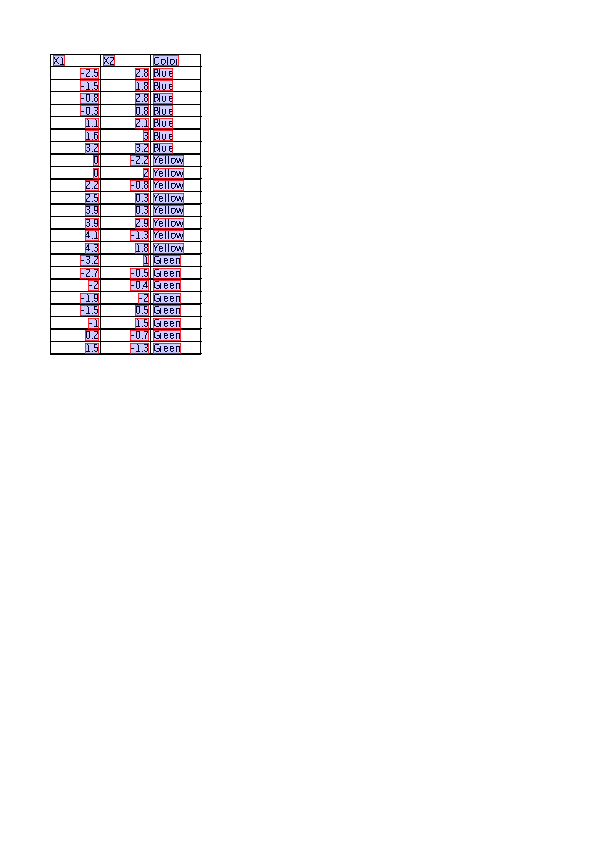

In [21]:
im = first_page.to_image()
im.draw_rects(first_page.extract_words())